# MENENTUKAN PEMBANGUNAN NEGARA BERDASARKAN FAKTOR SOSIAL EKONOMI DAN KESEHATAN

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('Data_Negara_HELP.csv')
df

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


Keterangan Data:

1. Negara : Nama negara
2. Kematian_anak: Kematian anak di bawah usia 5 tahun per 1000 kelahiran
3. Ekspor : Ekspor barang dan jasa perkapita
4. Kesehatan: Total pengeluaran kesehatan perkapita
5. Impor: Impor barang dan jasa perkapita
6. Pendapatan: Penghasilan bersih perorang
7. Inflasi: Pengukuran tingkat pertumbuhan tahunan dari Total GDP
8. Harapan_hidup: Jumlah tahun rata-rata seorang anak yang baru lahir akan hidup
jika pola kematian saat ini tetap sama
9. Jumlah_fertiliti: Jumlah anak yang akan lahir dari setiap wanita jika tingkat kesuburan usia saat ini tetap sama
10. GDPperkapita: GDP per kapita. Dihitung sebagai Total GDP dibagi dengan total populasi.

# Menghitung Jumlah Missing Values


In [ ]:
df.isnull().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

# Mencari Data Pencilan (Outlier)

In [ ]:
def get_lower_upper_bound(x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    return lower_bound, upper_bound

In [ ]:
def get_outlier_iqr(x):
    lower_bound, upper_bound = get_lower_upper_bound(x)
    return x[np.where((x > upper_bound) | (x < lower_bound))]

In [ ]:
print(get_outlier_iqr(df['Kematian_anak'].values))
print(get_outlier_iqr(df['Ekspor'].values))
print(get_outlier_iqr(df['Kesehatan'].values))
print(get_outlier_iqr(df['Impor'].values))
print(get_outlier_iqr(df['Pendapatan'].values))
print(get_outlier_iqr(df['Inflasi'].values))
print(get_outlier_iqr(df['Harapan_hidup'].values))
print(get_outlier_iqr(df['Jumlah_fertiliti'].values))
print(get_outlier_iqr(df['GDPperkapita'].values))

[149. 150. 208. 160.]
[103.  175.  153.   93.8 200. ]
[14.2 17.9]
[142. 154. 108. 174.]
[ 80600  75200  91700  62300 125000  72100  55500  57600]
[ 24.9  39.2 104.   26.5  45.9]
[47.5 32.1 46.5]
[7.49]
[ 51900  46900  44400  35300  47400  58000  46200  40600  41800  41900
  48700  35800  44500  38500 105000  50300  33700  87800  70300  46600
  52100  74600  35000  38900  48400]


<AxesSubplot:xlabel='Kematian_anak'>

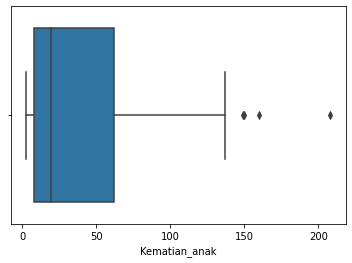

In [ ]:
import seaborn as sns
sns.boxplot(x='Kematian_anak', data=df)

<AxesSubplot:xlabel='Ekspor'>

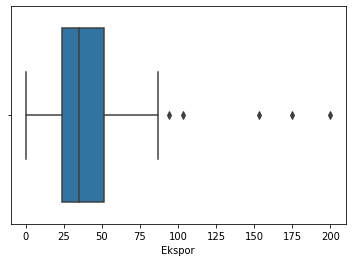

In [ ]:
sns.boxplot(x='Ekspor', data=df)

<AxesSubplot:xlabel='Kesehatan'>

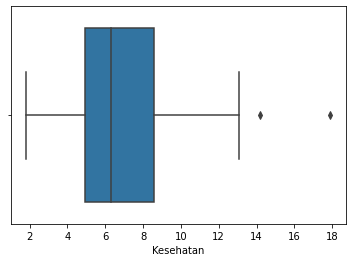

In [ ]:
sns.boxplot(x='Kesehatan', data=df)

<AxesSubplot:xlabel='Impor'>

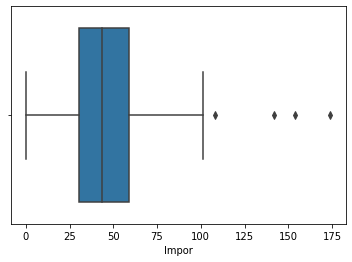

In [ ]:
sns.boxplot(x='Impor', data=df)

<AxesSubplot:xlabel='Pendapatan'>

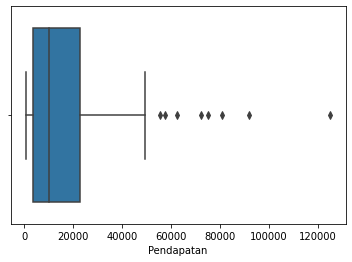

In [ ]:
sns.boxplot(x='Pendapatan', data=df)

<AxesSubplot:xlabel='Inflasi'>

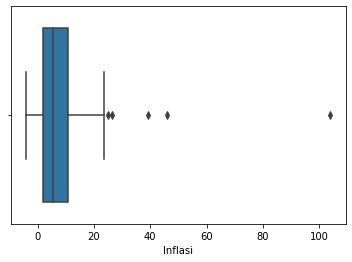

In [ ]:
sns.boxplot(x='Inflasi', data=df)

<AxesSubplot:xlabel='Harapan_hidup'>

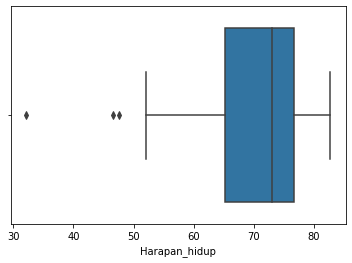

In [ ]:
sns.boxplot(x='Harapan_hidup', data=df)

<AxesSubplot:xlabel='Jumlah_fertiliti'>

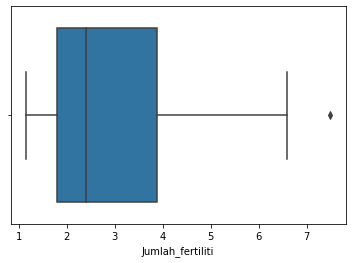

In [ ]:
sns.boxplot(x='Jumlah_fertiliti', data=df)

<AxesSubplot:xlabel='GDPperkapita'>

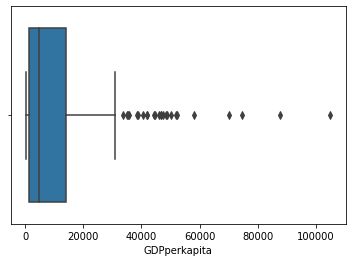

In [ ]:
sns.boxplot(x='GDPperkapita', data=df)

In [ ]:
def remove_outlier_IQR(x):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_final= df[~((df<(Q1 - 1.5*IQR)) | (df>(Q3 + 1.5*IQR)))]
    return df_final

In [ ]:
df_outlier_remove = remove_outlier_IQR(df)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18248\3007848947.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_final= df[~((df<(Q1 - 1.5*IQR)) | (df>(Q3 + 1.5*IQR)))]


In [ ]:
df_outlier_remove.dropna(axis=0, inplace=True)

In [ ]:
df_outlier_remove.isnull().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

<AxesSubplot:xlabel='Kematian_anak'>

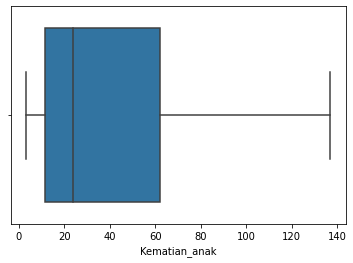

In [ ]:
sns.boxplot(x='Kematian_anak', data=df_outlier_remove)

<AxesSubplot:xlabel='Ekspor'>

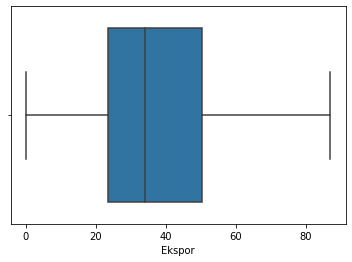

In [ ]:
sns.boxplot(x='Ekspor', data=df_outlier_remove)

<AxesSubplot:xlabel='Kesehatan'>

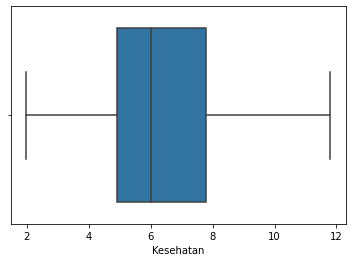

In [ ]:
sns.boxplot(x='Kesehatan', data=df_outlier_remove)

<AxesSubplot:xlabel='Impor'>

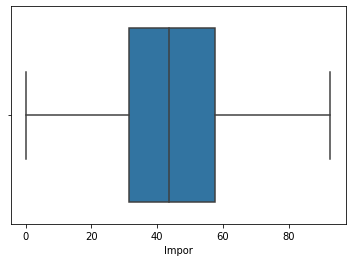

In [ ]:
sns.boxplot(x='Impor', data=df_outlier_remove)

<AxesSubplot:xlabel='Pendapatan'>

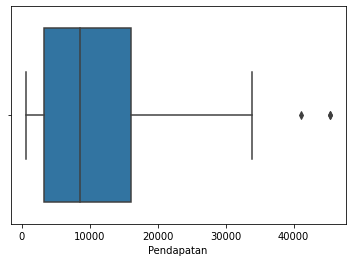

In [ ]:
sns.boxplot(x='Pendapatan', data=df_outlier_remove)

<AxesSubplot:xlabel='Inflasi'>

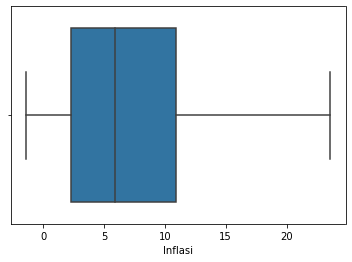

In [ ]:
sns.boxplot(x='Inflasi', data=df_outlier_remove)

<AxesSubplot:xlabel='Harapan_hidup'>

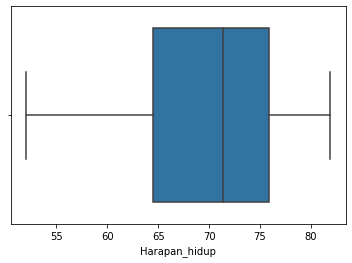

In [ ]:
sns.boxplot(x='Harapan_hidup', data=df_outlier_remove)

<AxesSubplot:xlabel='Jumlah_fertiliti'>

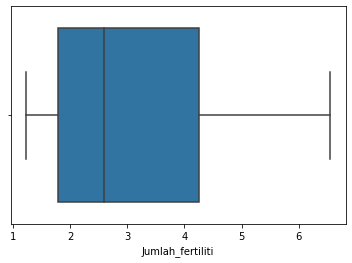

In [ ]:
sns.boxplot(x='Jumlah_fertiliti', data=df_outlier_remove)

<AxesSubplot:xlabel='GDPperkapita'>

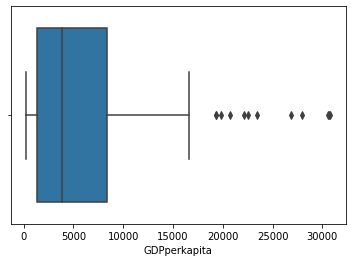

In [ ]:
sns.boxplot(x='GDPperkapita', data=df_outlier_remove)

In [ ]:
df_outlier_remove.sort_values('Pendapatan', ascending=False)

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
128,Saudi Arabia,15.7,49.60,4.29,33.0,45400.0,17.20,75.1,2.96,19300.0
115,Oman,11.7,65.70,2.77,41.2,45300.0,15.60,76.1,2.90,19300.0
11,Bahrain,8.6,69.50,4.97,50.9,41100.0,7.44,76.0,2.16,20700.0
42,Cyprus,3.6,50.20,5.97,57.5,33900.0,2.01,79.9,1.42,30800.0
139,Spain,3.8,25.50,9.54,26.8,32500.0,0.16,81.9,1.37,30700.0
...,...,...,...,...,...,...,...,...,...,...
94,Malawi,90.5,22.80,6.59,34.9,1030.0,12.10,53.1,5.31,459.0
106,Mozambique,101.0,31.50,5.21,46.2,918.0,7.64,54.5,5.56,419.0
26,Burundi,93.6,8.92,11.60,39.2,764.0,12.30,57.7,6.26,231.0
88,Liberia,89.3,19.10,11.80,92.6,700.0,5.47,60.8,5.02,327.0


In [ ]:
df_outlier_remove.to_csv('Data_Negara_HELP (After Handling Missing Value and Outlier).csv')

# Clustering Menggunakan KMeans dan Elbow Method

# Grafik 1: Hubungan antara Nilai Pendapatan terhadap Nilai Ekspor

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans



In [ ]:
df8 = df_outlier_remove.drop(columns=['Negara', 'Kematian_anak', 'Impor', 'Inflasi', 'Harapan_hidup', 'Kesehatan', 'GDPperkapita', 'Jumlah_fertiliti'])

df8

,Ekspor,Pendapatan
0,10.0,1610.0
1,28.0,9930.0
2,38.4,12900.0
3,62.3,5900.0
4,45.5,19100.0
...,...,...
161,31.7,4240.0
162,46.6,2950.0
164,72.0,4490.0
165,30.0,4480.0


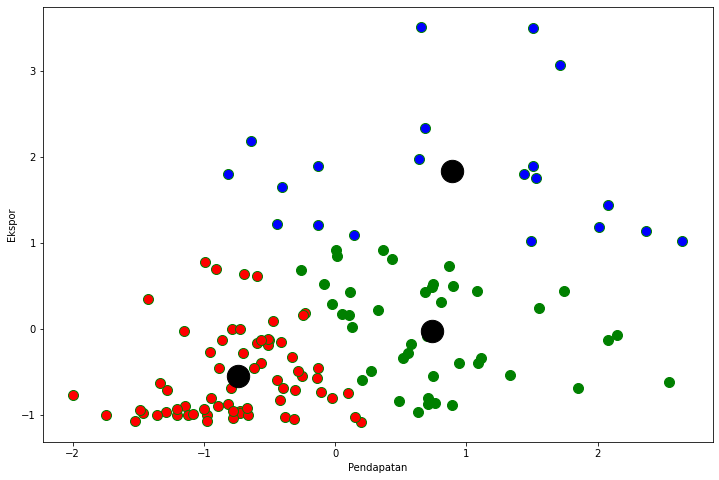

In [ ]:
sc = StandardScaler()
dfoutlier_std_8 = sc.fit_transform(df8.astype(float))

kmeans8 = KMeans(n_clusters=3, random_state=42,).fit(dfoutlier_std_8)
labels8 = kmeans8.labels_

new_dfoutlier_std_8 = pd.DataFrame(data = dfoutlier_std_8, columns = ['Pendapatan', 'Ekspor'])
new_dfoutlier_std_8['label_kmeans8'] = labels8

fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(new_dfoutlier_std_8.Pendapatan[new_dfoutlier_std_8.label_kmeans8 == 0], new_dfoutlier_std_8.Ekspor[new_dfoutlier_std_8.label_kmeans8 == 0], c='blue', s=100, edgecolor='green', linestyle='-')
plt.scatter(new_dfoutlier_std_8.Pendapatan[new_dfoutlier_std_8.label_kmeans8 == 1], new_dfoutlier_std_8.Ekspor[new_dfoutlier_std_8.label_kmeans8 == 1], c='red', s=100, edgecolor='green', linestyle='-')
plt.scatter(new_dfoutlier_std_8.Pendapatan[new_dfoutlier_std_8.label_kmeans8 == 2], new_dfoutlier_std_8.Ekspor[new_dfoutlier_std_8.label_kmeans8 == 2], c='green', s=100, edgecolor='green', linestyle='-')
centers = kmeans8.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500);
plt.xlabel('Pendapatan')
plt.ylabel('Ekspor')
plt.show()

Ringkasan Grafik:
 - Semakin tinggi nilai ekspor, maka semakin tinggi pendapatan di suatu negara.

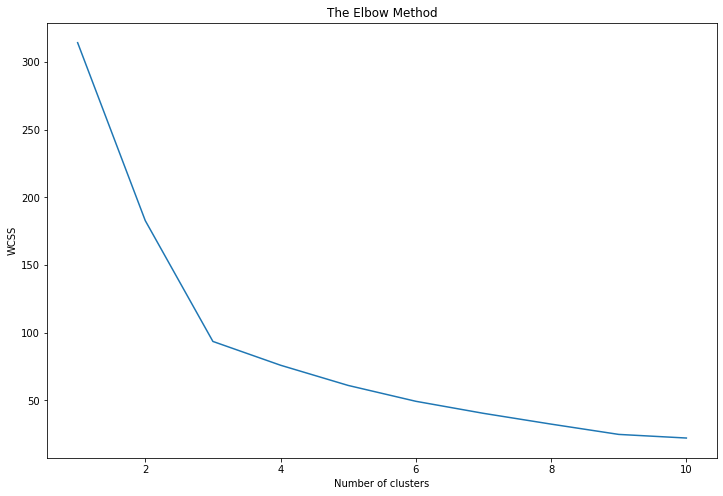

In [ ]:
wcss_8 = []
for i in range(1, 11):
    kmeans8 = KMeans(n_clusters = i,init='k-means++', random_state = 42)
    kmeans8.fit(new_dfoutlier_std_8)
    wcss_8.append(kmeans8.inertia_)
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(range(1, 11), wcss_8)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans8_2 = KMeans(n_clusters=3, init='k-means++', random_state=42).fit(dfoutlier_std_8)

kmeans8_2.labels_

array([1, 1, 2, 2, 2, 1, 1, 2, 0, 0, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1,
       1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1, 1, 1, 1, 1, 0, 2,
       2, 1, 1, 1, 0, 1, 1, 1, 1, 2, 0, 1, 1, 1, 2, 0, 1, 2, 2, 1, 1, 2,
       1, 2, 2, 1, 0, 0, 2, 1, 1, 0, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 0,
       1, 2, 2, 1, 1, 0, 0, 2, 0, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0, 0, 1, 1,
       1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1])

# Grafik 2 Hubungan antara Nilai Pendapatan terhadap Angka Kematian Anak


In [ ]:
df10 = df_outlier_remove.drop(columns=['Negara', 'Impor', 'Ekspor', 'Inflasi', 'Harapan_hidup', 'Kesehatan', 'GDPperkapita', 'Jumlah_fertiliti'])

df10

,Kematian_anak,Pendapatan
0,90.2,1610.0
1,16.6,9930.0
2,27.3,12900.0
3,119.0,5900.0
4,10.3,19100.0
...,...,...
161,36.3,4240.0
162,29.2,2950.0
164,23.3,4490.0
165,56.3,4480.0


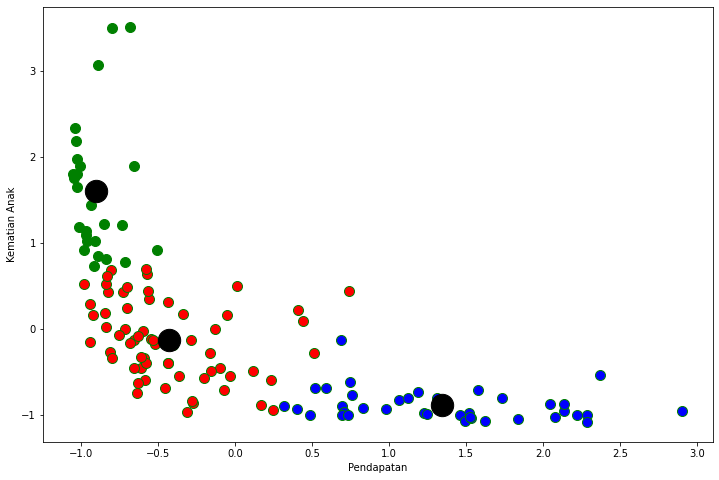

In [ ]:
dfoutlier_std_10 = sc.fit_transform(df10.astype(float))

kmeans10 = KMeans(n_clusters=3, random_state=42,).fit(dfoutlier_std_10)
labels10 = kmeans10.labels_

new_dfoutlier_std_10 = pd.DataFrame(data = dfoutlier_std_10, columns = ['Pendapatan', 'Kematian_anak'])
new_dfoutlier_std_10['label_kmeans10'] = labels10

fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(new_dfoutlier_std_10.Pendapatan[new_dfoutlier_std_10.label_kmeans10 == 0], new_dfoutlier_std_10.Kematian_anak[new_dfoutlier_std_10.label_kmeans10 == 0], c='blue', s=100, edgecolor='green', linestyle='-')
plt.scatter(new_dfoutlier_std_10.Pendapatan[new_dfoutlier_std_10.label_kmeans10 == 1], new_dfoutlier_std_10.Kematian_anak[new_dfoutlier_std_10.label_kmeans10 == 1], c='red', s=100, edgecolor='green', linestyle='-')
plt.scatter(new_dfoutlier_std_10.Pendapatan[new_dfoutlier_std_10.label_kmeans10 == 2], new_dfoutlier_std_10.Kematian_anak[new_dfoutlier_std_10.label_kmeans10 == 2], c='green', s=100, edgecolor='green', linestyle='-')
centers = kmeans10.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500);
plt.xlabel('Pendapatan')
plt.ylabel('Kematian Anak')
plt.show()

Ringkasan Grafik:
 - Semakin tinggi nilai pendapatan, maka semakin rendah angka kematian anak di suatu negara.

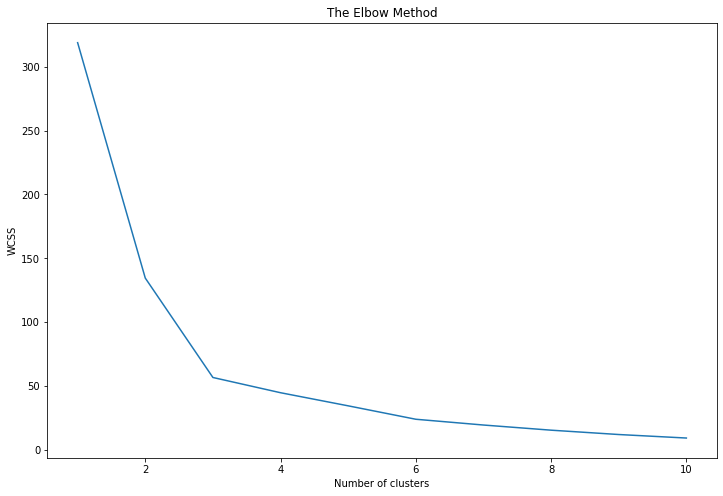

In [ ]:
wcss_10 = []
for i in range(1, 11):
    kmeans10 = KMeans(n_clusters = i,init='k-means++', random_state = 42)
    kmeans10.fit(new_dfoutlier_std_10)
    wcss_10.append(kmeans10.inertia_)
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(range(1, 11), wcss_10)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans10_2 = KMeans(n_clusters=3, init='k-means++', random_state=42).fit(dfoutlier_std_10)

kmeans10_2.labels_

array([0, 1, 1, 0, 2, 2, 1, 1, 2, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 2, 1, 1, 0, 0, 0, 1, 0, 2, 2, 2, 1, 1, 1, 1, 0, 2, 1,
       1, 0, 1, 0, 2, 1, 1, 0, 0, 1, 2, 0, 1, 1, 1, 2, 1, 1, 2, 0, 0, 1,
       0, 2, 1, 0, 2, 2, 1, 0, 0, 2, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 2,
       0, 1, 1, 1, 1, 2, 2, 1, 2, 0, 1, 2, 0, 1, 2, 2, 1, 1, 2, 2, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0])

# KESIMPULAN

LSM CEO sebaiknya memprioritaskan membagikan dananya terhadap negara-negara yang memiliki ciri-ciri berdasarkan prioritas urutannya sebagai berikut:
1. Pendapatan yang rendah
2. Angka Kematian Anak yang tinggi
3. Ekspor yang rendah

Karena pendapatan negara adalah sebuah penghasilan negara yang bisa digunakan
untuk memenuhi kebutuhan pokok masyarakat yang bisa meningkatkan kesejahteraan
masyarakat. Selain itu, angka kematian anak juga perlu diperhatikan karena angka kematian yang tinggi akan berpotensi kurangnya sumber daya manusia untuk berkontribusi meningkatkan pendapatan negara, khususnya di sektor eksportir karena angka ekspor di sini juga berperan meningkatkan pendapatan negara.